<a href="https://colab.research.google.com/github/conradoov/formacao_machine_learning_alura/blob/main/entendendo_modelos_de_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 199 kB 46.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


# Trabalhando com base de modelos de classificação

Neste curso serão abordados modelos de classificação para analise de uma base que envolve a gestão comercial de clientes (Churn)

Objetivo: selecionar características que classifiquem potenciais clientes com relação ao potencial seu potencial de fidelização (perda ou manutenção do contrato) -  Churn (Sim, Nao)

## Importando e analisando base de dados

In [18]:
#Diferente do que foi abordado no curso, obtive a base diretamente do Github da Alura
import pandas as pd
import requests
import io
import numpy as np

uri = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"

    
# Downloading the csv file from your GitHub account

download = requests.get(uri).content

raw_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

raw_df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
raw_df.shape

(7043, 18)

In [4]:
traducao_dic = {'Sim':1,
                'Nao':0}


df_modificado = raw_df[['Conjuge',
                           'Dependentes',
                           'TelefoneFixo',
                           'PagamentoOnline',
                           'Churn']].replace(traducao_dic)

In [5]:
#Obtendo variaveis dummies através do get_dummies

df_dummy = pd.get_dummies(raw_df.drop(columns=['Conjuge',
                           'Dependentes',
                           'TelefoneFixo',
                           'PagamentoOnline',
                           'Churn'], axis=1))

Definição formal de um modelo:


*   X: dados de entrada - inputs
*   y: dados de saída - outputs




In [6]:
pd.set_option('display.max_columns', 50)
df = pd.concat([df_modificado, df_dummy], axis=1)
df.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


### Balanceamento de Variáveis

*   Variaveis desbalanceadas são variáveis que 
apresentam quantidades bastante diferentes entre suas categorias.</b>
*   Oversampling é uma técnica que busca corrigir este efeito. Ela realiza a criação de novas observações da classe quando há menos amostras, igualando a proporção de categorias.</b>
*   Tecnica de Oversampling utilizada nesta etapa será a **SMOTE** que consiste em criar observações intermediárias entre os dados que estão próximos.

In [7]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = df.drop('Churn', axis = 1)
y = df['Churn']

In [8]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [9]:
df = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


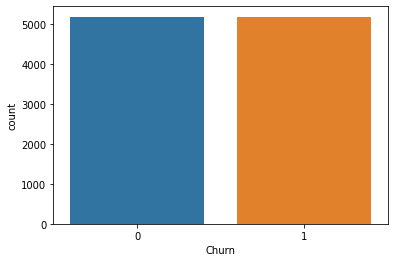

In [10]:
import seaborn as sns

ax = sns.countplot(x='Churn', data=df)  # plotando a variável target balanceada.

## Modelo de Classificação KNN

*    Modelo de classificação baseado na próximidade
*    Calcula a distancia entre os outputs (pontos cartesianos) a partir de um número K (especificado) de vizinhos mais próximos
*    Agrupa os pontos com menor distancia a partir dos K vizinhos mais próximos
*    Classificados com base nas suas características de inputs

*    K pequeno >> overfitting
*    K muito grande >> underfitting

In [11]:
#inputs e outputs
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [12]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_norm = norm.fit_transform(X)
X_norm

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

Funções de distância:
* Euclidiana: subtração das coordenadas de uma observação pela outra observação, elevando ao quadrado os resultados. Soma-se os valores e extrai a raíz quadrada
* Manhattan: Considera apenas a soma dos módulos das diferenças entre cada par de coordenadas
* Minkowski: 
 * Generalização das outras
 * Extrair o módulo da diferença entre cada par de coordenadas elevando oresultado a m, realiza a soma de todos os termos e, por fim, tra a raiz m-ésima, em que m é um número qualquer.
 * A Euclidiana é uma Minkowski de m = 2
* Chebyshev: Considera apenas o valor máximo entre os módulos das diferenças entre as variáveis.
 * Leva em consideração apenas a variável que possui a maior diferença de valores entre as duas observações

No sklearn
 *   “euclidean” para a distância euclidiana;
 *   “manhattan” para a distância de Manhattan;
 *   “minkowski” para a distância de Minkowski;
 *   “chebyshev” para a distância de Chebyshev.

### Divisao treino/teste

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

### KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')

#model fit

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [15]:
predict_knn = knn.predict(X_test)
predict_knn

array([1, 0, 0, ..., 0, 1, 1])

In [16]:
print("Score do modelo = %.2f%%" % (knn.score(X_test, y_test)*100))

Score do modelo = 81.48%


#### Teorema de Naive Bayes

*   Probabilidade condicional -> Probabilidade de um evento ocorrer sabendo que um outro evento, chamado de condicionante, já ocorreu P(A|B)</br>
 * Exemplo: Probabilidade de se ter covid quando seu teste deu positivo (entra os falsos negativos e a probabilidade de se estar com covid em relação à situação geral)</br>
*   Princípio da independencia condicional: cada uma das características de uma determinada classe contribuem de forma independente entre si para que uma classe seja determinada </br>
*   Verossímilhança: mede a probabilidade de que um evento tenha acontecido </br>
Prob priori da classe: qual a prob de uma determinada classe ocorrer em relação à toda amostra </br>
*   Prob a pior da evidência: qual a probabilidade da evidência ocorrer </br>


##### Modelo Bernoulli Naive Bayes -> BernoulliNB()



*   Multivariada de Bernoulli: dados em variáveis binárias (0 1)
*   Parâmetro P da Distribuição de Bernoulli: Probabilidade de uma caracteristica que apareça em 1 dado que o resultado foi 0



> 3 implementações mais utilizadas do SKlearn: BernoulliNB(), GaussianNB() e MultinomialNB()

>Churn é uma variável binária

In [20]:
#Valor ideal para dividirmos nossos dados e colocarmos como limite (X > mediana = 1 | X < mediana =0)
#utilizando a mediana, pois é o valor central dos dados
central = np.median(X_train)
central

-0.4461759755508453

In [21]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=central)

bnb.fit(X_train, y_train)

BernoulliNB(binarize=-0.4461759755508453)

In [24]:
predict_bnb = bnb.predict(X_test)
predict_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [26]:
print("Model Score = %.2f%%" % (bnb.score(X_test, y_test)*100))

Model Score = 75.43%


### Decision Tree

*   Usado tanto para classificação quando regressão
*   Nó raiz: primeiro nó de decisão
*   Árvore de decisão onde cada nó representa uma decisão criteral (critério de impureza)
*   Nós de decisão: decidem se um modelo será classificado como 0 ou 1 com base na decisão decidida no nó (Nó final ou nó folha ou nó terminal)


Desvantagens
>Overfitting</br>
>Instabilidade

Principais critérios de divisão de nós:
*   Índice Gini (importante)
 * Objetivo é medir o quão heterogênio o dado está, ou seja, mais próximo de 1
 * Quanto menor, melhor (mais homogênio)
*   Qui-quadrado
*   Ganho de informação (Entropy) (Importante)
 * Quanto menor, melhor. Mais ordenado, maior ganho de informação.
*   Redução da Variância

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)


dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [36]:
predict_dtc = dtc.predict(X_test)

In [38]:
predict_dtc

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
print("DTC Model Score = %.2f%%" % (dtc.score(X_test, y_test)*100))

DTC Model Score = 80.77%


## Validação dos modelos

### Matriz de confusão

Tabela contendo 4 formas de visualizar os resultados: </br>
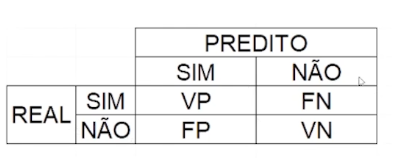

As colunas representam os resultados preditos e as linhas representam os valores reais (como realmente são)</br>
>VP = verdadeiro positivo </br>
  VN = verdadeiro negativo </br>
  FP = falso positivo </br>
  FN = falso negativo </br>

> FN = erro tipo 1 </br>
FP = erro do tipo 2


In [42]:
# Função para gerar a matriz de confusão como está no para saber mais.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)
    
    ax = plt.subplot()
    sns.set(font_scale=1.1) 
    sns.heatmap(matriz_confusao,
                annot=lb,
                ax=ax,
                cmap=cmap,
                fmt="",
                xticklabels=categorias,
                yticklabels=categorias)
    
    label_font = {'size':'12'}  
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);
    
    ax.tick_params(axis='both', which='major', labelsize=10)  

In [43]:
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

In [44]:
from sklearn.metrics import confusion_matrix
mc1 = confusion_matrix(y_test, predict_knn)
print(confusion_matrix(y_test, predict_knn))

[[1241  328]
 [ 247 1289]]


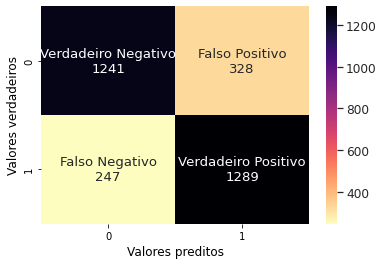

In [45]:
gerando_matriz(mc1, labels, categorias, cmap="magma_r")

In [47]:
mc2 = confusion_matrix(y_test, predict_bnb)
print(confusion_matrix(y_test, predict_bnb))

[[1048  521]
 [ 242 1294]]


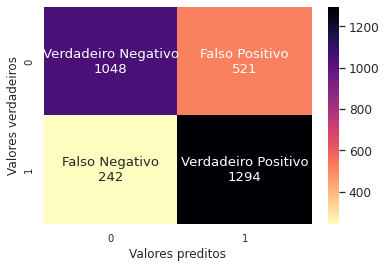

In [48]:
gerando_matriz(mc2, labels, categorias, cmap="magma_r")

In [49]:
mc3 = confusion_matrix(y_test, predict_dtc)
print(confusion_matrix(y_test, predict_dtc))

[[1249  320]
 [ 277 1259]]


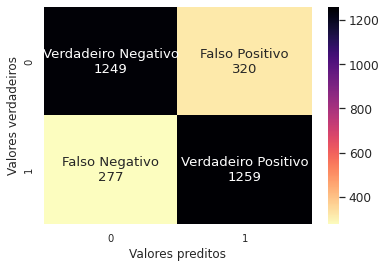

In [50]:
gerando_matriz(mc3, labels, categorias, cmap="magma_r")

Comparando as matrizes de confusão, podemos perceber que KNN e DTC tiveram melhores valores VP e VN. Porém BNB apresenta um alto número de FP

### Acurácia dos modelos

*   Do total, o quanto o modelo acertou

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("KNN Model Score = %.2f%%" % (accuracy_score(y_test, predict_knn)*100))

KNN Model Score = 81.48%


In [56]:
print("BNB Model Score = %.2f%%" % (accuracy_score(y_test, predict_bnb)*100))

BNB Model Score = 75.43%


In [58]:
print("DTC Model Score = %.2f%%" % (accuracy_score(y_test, predict_dtc)*100))

DTC Model Score = 80.77%


### Precisão
*   Calcula quantos verdadeiros positivos foram calculados de forma correta

In [59]:
from sklearn.metrics import precision_score

In [60]:
print("KNN Model Precision Score = %.2f%%" % (precision_score(y_test, predict_knn)*100))

KNN Model Precision Score = 79.72%


In [61]:
print("BNB Model Precision Score = %.2f%%" % (precision_score(y_test, predict_bnb)*100))

BNB Model Precision Score = 71.29%


In [62]:
print("DTC Model Precision Score = %.2f%%" % (precision_score(y_test, predict_dtc)*100))

DTC Model Precision Score = 79.73%


### Recall
*   Sensibilidade
*   Calcula o quão bom o modelo está em classificar corretamente os resultados verdadeiramente positivos

In [63]:
from sklearn.metrics import recall_score

In [64]:
print("KNN Model Recall Score = %.2f%%" % (recall_score(y_test, predict_knn)*100))

KNN Model Recall Score = 83.92%


In [66]:
print("BNB Model Recall Score = %.2f%%" % (recall_score(y_test, predict_bnb)*100))

BNB Model Recall Score = 84.24%


In [65]:
print("DTC Model Recall Score = %.2f%%" % (recall_score(y_test, predict_dtc)*100))

DTC Model Recall Score = 81.97%


### Algumas outras métricas de avaliação do modelo
* F1-Score
 * Identifica se algum dos valores de recall ou precisão estão baiuxos, uma vez que não é interessante um modelo com alto recall ou pouca previsão
 * Menor, melhor
* Curva ROC ou AUC
 * Area Under the Curve
 * Quanto maior, melhor (max 1)
 * Calculada com diversos pontos de corte
 * Cria uma matriz de confusão para cada ponto de corte
 * Quanto mais rapidamente uma curva atinge o ponto 100% (1 eixo y) mais valores negativos ela classificará positivamente até chegar no eixo (1,1)
 * O AUC calcula a área em que a curva permanece abaixo do 100%, quanto maior, melhor

### Decidindo o melhor modelo:

* Precisão foi definida como a métrica chave foi porque o Churn positivo é o mais importante nessa avaliação, pois é o valor que precisamos reduzir nesta análise.
* Portanto, o melhor modelo para o cliente é o DTC